<div style="color: red;">DEVELOP AN INCOME CLASSIFIER SYSTEM FOR INDIVIDUALS</div>     
<div style="color: green;">The objective is to:</div>     
<div style="color: red;">Simplify the data system by reducing the number of variables to be studied ,without sacrificing too much of accuracy . Such a system would help subsidy income in plannning subsidy outlay, monitoring and preventing misuse</div>                                              

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# To partition the dat 
from sklearn.model_selection import train_test_split


In [7]:
# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [8]:
# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix


In [9]:
# Importing Data
data_income = pd.read_csv('income.csv')

In [10]:
# Creating a copy of original data                                                                              
data = data_income.copy()


In [11]:
# To check variables' data type
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [12]:
# Check for missing values             
data.isnull() 

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
print('Data columns with null values:\n', data.isnull().sum())



Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [14]:

# Summary of numerical variables
summary_num = data.describe()
print(summary_num)            


                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [15]:
#Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)


         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


<div style="color: red;">From the above output, we now just know how many unique values are there ,but we would be interested in getting the unique categories under a variable, so that it gives us an idea what are the categories that are there in a perticular variable , so for that case value_counts() gives us better representation .</div>  


In [16]:
# Frequency of each categories
data['JobType'].value_counts()




 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [17]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

<div style="color: red;">Now , Handling special character '?'</div> 

In [18]:
# Checking for unique classes
print(np.unique(data['JobType'])) 



[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


<div style="color: green;">From above output , There are space before question mark </div> 



In [19]:
#  read the data by including "na_values[' ?']" to consider ' ?' as nan !!!

data = pd.read_csv('income.csv',na_values=[" ?"]) 


<div style="color: red;">Data Pre-processing </div> 

In [20]:
data.isnull().sum()


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [21]:
missing = data[data.isnull().any(axis=1)]


In [22]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

<div style="color: blue;">From above , it's very clear that whenever job type is missing ,The occupation is also missing ,but the total number of missing values is 1816 rows . There is  a special category called never worked and the corresponding value of  the occupation is nan . since the job type is never worked so if you saw the job type there is a category called never worked . If the individual has never worked , then occupation could not be fill . that is the resion you have nan value under the occupation. </div> 

<div style="color: green;">Points to note :: </div> 
<div style="color: blue;">1. Missing values in job type = 1809 </div> 
<div style="color: blue;">2. Missing values in occupation=1816 </div>
<div style="color: blue;">3.There are 1809 rows where two specific columns i.e occupation and jobtype have missing values </div>
<div style="color: blue;">4. (1816-1809=7) => you still have occupation unfilled for these 7 rows  because job type is never worked. </div>
        <div style="color: blue;">======> now in this case we can delet the cases containig the missing data or replace the missing values with the reasonable alternative data values </div>
        

In [23]:
data2 = data.dropna(axis=0)


In [24]:
# Realtionship between independent variables
correlation = data2.corr()


In [25]:
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


<div style="color: blue;">So, if you look at correlation values none of the variables correlation . none of the values are  nearer to 1 ,most of the values are nearer to 0 it represets that none of the variables are correlated with each other because the correlation values lies from -1 to +1. </div>
<div style="color: blue;">===> So, none of the variables are correlated with each other. so ,now we will consider categorical variables to look at relationship  </div>


In [26]:
# Extracting the column names
data2.columns   

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [27]:
# Gender proportion table:
# =============================================================================
gender = pd.crosstab(index = data2["gender"], 
                     columns  = 'count', 
                     normalize = True)


print(gender)


col_0       count
gender           
 Female  0.324315
 Male    0.675685


<div style="color: blue;">If you see hare male are high in frequency that is 67 percent corresponds to male and only 33 percent corresponds to female  </div>
<div style="color: blue;"> So, now we have got an idea about what is the proportion of gender we have </div> 


In [28]:
#  Gender vs Salary Status:
# =============================================================================
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals


In [29]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


<div style="color: blue;">By setting normalize is equal to index , I am getting row proportion equals to 1 .so ,from the output, it's very clear that only 11 percent of the female earn greater than 50000 US dollars and 89 percent earn less than 50000 us dollars ,but men are more likely to earn more than when compared with women  </div> 

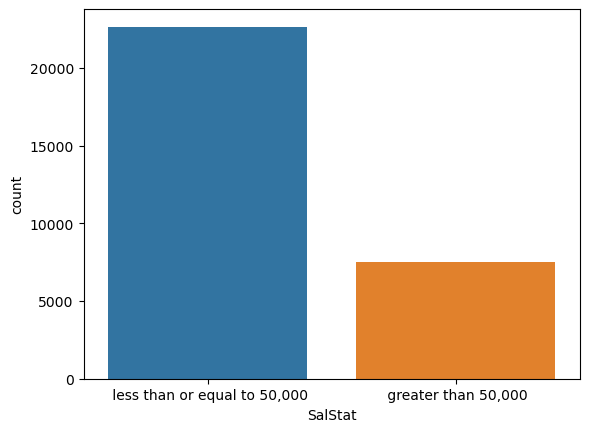

In [30]:
# Frequency distribution of 'Salary status' 
# =============================================================================
SalStat = sns.countplot(x=data2['SalStat'])


# 75 % of people's salary status is <=50,000 & 25% of people's salary status is > 50,000


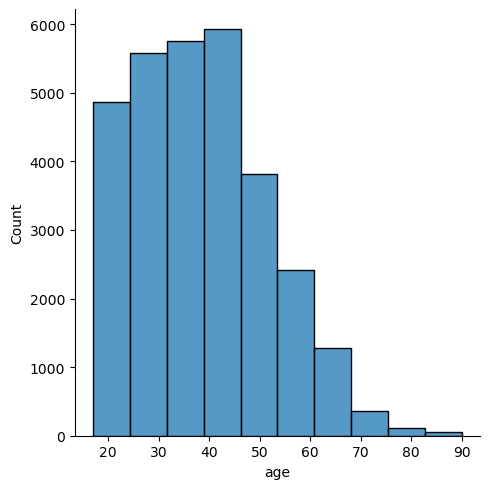

In [27]:
##############  Histogram of Age  #############################


sns.displot(x=data2['age'], bins=10, kde=False)


# People with age 20-45 age are high in frequency


<AxesSubplot:xlabel='SalStat', ylabel='age'>

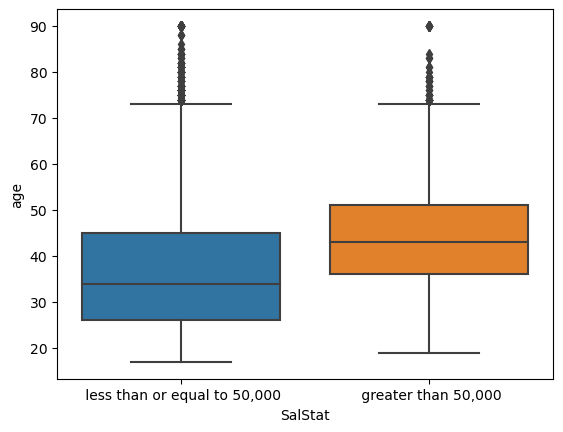

In [29]:

############# Box Plot - Age vs Salary status #################

sns.boxplot(x='SalStat', y='age', data=data2)





## people with 35-50 age are more likely to earn > 50000 USD p.a
## people with 25-35 age are more likely to earn <= 50000 USD p.a


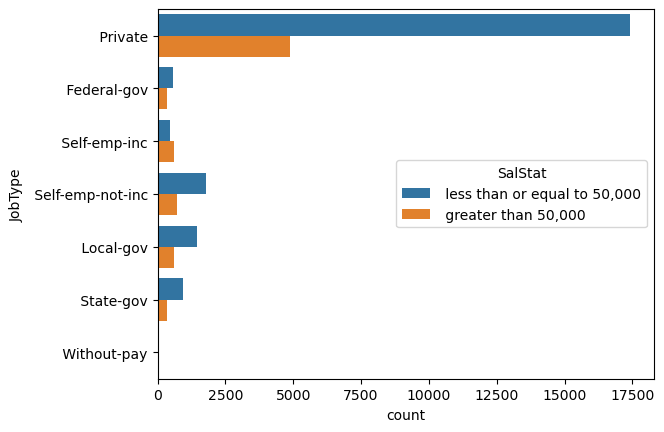

In [30]:
#*** JOBTYPE  vs SALARY 

JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)



# If You see here most of the individuals works in a private organisation and very few works in the state government 

In [31]:
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


# From the above table it is visible that 56% of self employed people earn more than 50000 USD per year .
# if you look at job type , it will be an important variable in avoiding the misuse of subsidies 

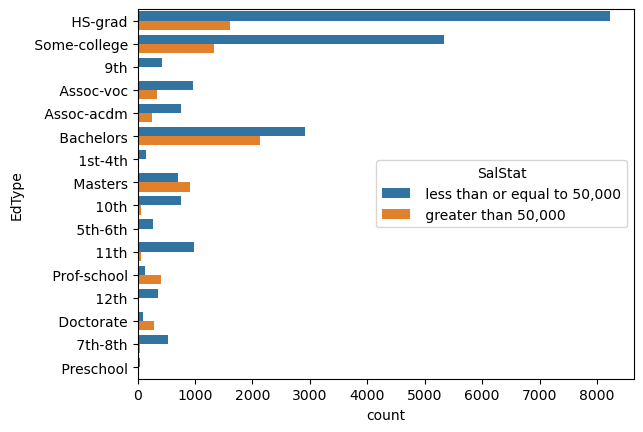

In [32]:
#*** EDUCATION vs SALARY STATUS 

Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)



# If you look at the frequencies of each categories only the higher secondary graduation has the highest frequency .most of the people have finished the higher secondary graduation and followed by some collage .
# And if you see here the blue bar is the representative of less than or equal to 50000 and graeter than 50000 .
            so , now let us look at the relationship that exists between the salary status in education to see how the salary status varing across the education type .
                     so , I am going to use the cross table for that .

In [33]:
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)



SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


# so, from the above table we can see that people who have done doctorate masters and professional school are more likely to earn above 50000 US dollers per year when compaired with the other education type and hence it can be an influencing variable in avoiding the misuse of the subsidies 

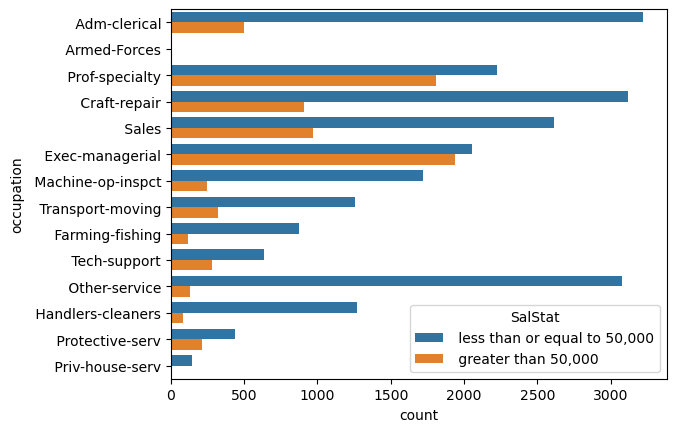

In [34]:
#***   Occupation vs Salary status 

Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)


# If you look at the categories under the occupation it has so many to it strating from administrative clerical and it has so many categories like armed forces farm fishing technical support and other services .
# and if you try to interpret how salary status is dependent on occupation , then there is a clear demarcation because there is no equal length of bars for both the colors like for less than or equal to 50 or greater than 50 .

>>>>>> for each and every level of the occupation  the salary status , the praportion  or the frequency of salary status is differing .
so, let us get an clear idea using the cross table .

In [35]:
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)


SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


# so, here is the cross table for occupation vs salary so that we will get an idea whether the salary status is dependent on occupation or not .so from the output there are two level one is executive-managerial and the other is prof-specialty . And those who make more than 50000 US dollars per year are more likely to work as manager and professionals . hence it can be an important variable in avoding  the misuse the subsides 

<AxesSubplot:xlabel='capitalgain'>

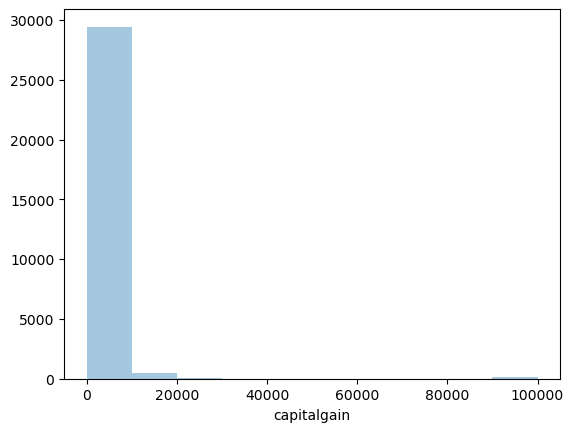

In [38]:
#*** Capital gain

sns.distplot(data2['capitalgain'], bins = 10, kde = False)



# though the capital gain is  ranging from 0 to 1 lack , but there are more observations in between the bins 0 to 20000 . so , that means 92% of the capital gain is 0  which corresponds to 27611 observation and only 8% of the people have gained something from selling their asset or a gain profit out of their investment ,so this could be one of the important variable to classify the individual salary status .

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\PRINCE\AppData\Local\Temp\ipykernel_16140\4183655042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
